### 지도학습 절차

- 지도학습 : 목표변수(Y)와 설명변수(X)의 관계를 학습해서, 새로운 X가 들어올 때, Y를 예측 / 분류

- 지도학습의 절차 6단계:
  1. 데이터 핸들링 (데이터 불러오기 / 파생변수 생성 / 층별화) : 데이터 구조적인 관점에서 학습을 수행할 수 있는 데이터셋을 구성하는 과정

  2. 학습에 사용될 목표변수(Y)와 설명변수(X)를 설정
    - 유의사항 : 사용되는 X는 새로 들어올 데이터에 대한 값으로 지정 ex. 신규고객 이탈 예측을 할 때 구매횟수와 방문횟수를 넣으면 안 됨.

  3. 학습 데이터(Train Set)와 검증 데이터(Test Set)분할
    - 검증 데이터(Test Set)는 학습에 참여하지 않는다! (교차검증에서 Validation Set과는 다른 개념)

  4. 학습을 수행 (Modeling)
    - 특성공학 (결측값 처리 / Encoding / Scaling ...) -> Pipe Line을 이용해서
    - 학습 (알고리즘)

  5. 학습된 모델 평가
    - 학습 능력 평가
    - 일반화 능력 평가


In [2]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

- 사용한 데이터 (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [3]:
# 데이터 불러오기
df1 = pd.read_csv('diabetes.csv')
print(df1.shape)
print(df1.info())
print(df1.head())
print(df1.tail())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2         

In [4]:
# 환자의 건강 관련 정보를 입력했을 때, 당뇨병에 걸릴지 말지에 대한 판별 모델 생성
# 1) 데이터 핸들링
df1['Outcome'].unique()

array([1, 0])

In [5]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **결측치는 없지만 0이 나올 수 있는 변수와 아닌 변수를 구분해서 EDA 할 것**

## **Pregrance**
 - 임신횟수
 - 임신 횟수는 0이 나올 수 있음.

In [6]:
# 셀 추가해서 EDA 하기

In [7]:
df1["Pregnancies"].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [8]:
df1["Pregnancies"].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

<Axes: xlabel='Pregnancies', ylabel='Count'>

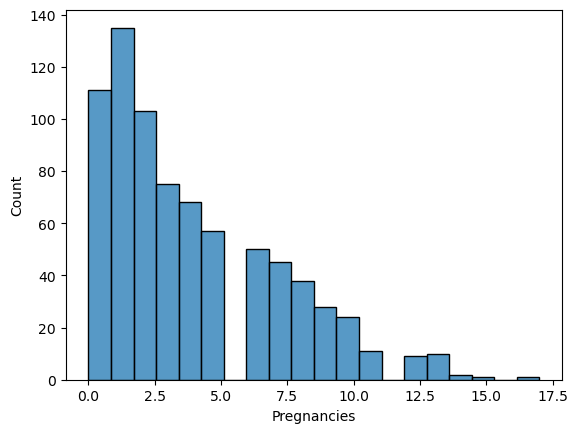

In [9]:
sns.histplot(df1['Pregnancies'], bins=20)

전반적으로 임신횟수가 많을 수록 빈도수가 적음.

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

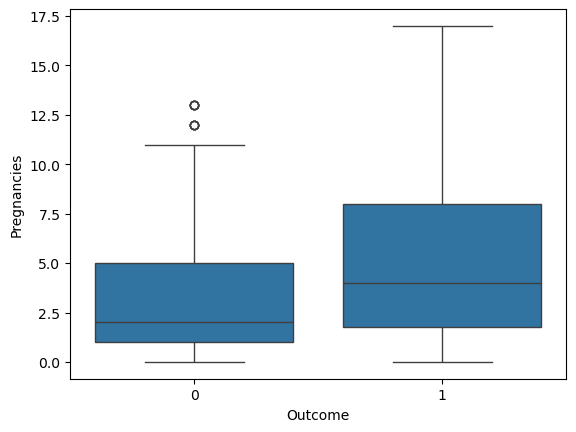

In [10]:
sns.boxplot(x='Outcome', y='Pregnancies', data=df1)

임신 횟수가 증가할수록 당뇨 발생 확률이 증가하는 것으로 보임.

### **변수 인사이트 정리**

Pregnancies 변수는 임신횟수가 적을 수록 높은 빈도수를 보이며, 임신 횟수가 증가할수록 당뇨 발생 확률이 증가하는 것으로 보인다.

## **glucose**
- 혈장 포도당 농도
- 사람 혈당이 0일 수는 없다.
- 당뇨는 혈당이 지속적으로 높은 증상

In [11]:
# 셀 추가해서 EDA 하기

In [12]:
df1['Glucose'].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

<Axes: ylabel='Glucose'>

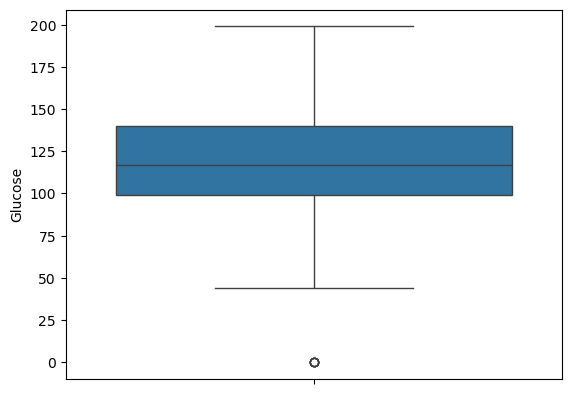

In [13]:
sns.boxplot(df1['Glucose'])

<Axes: xlabel='Glucose', ylabel='Count'>

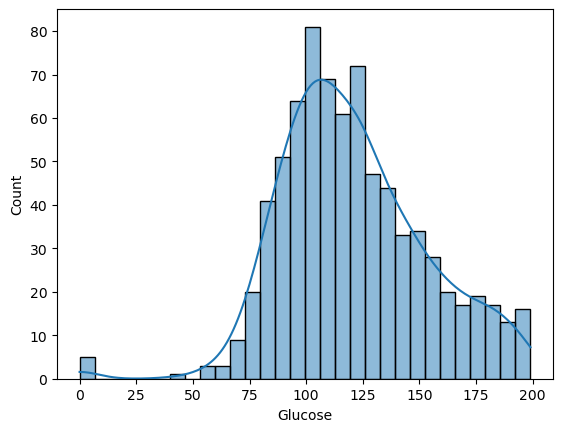

In [14]:
sns.histplot(df1['Glucose'],bins=30,kde=True)

혈당이 0일 수 없는데 0이 있는 것을 확인.

In [15]:
(df1['Glucose']==0).sum()

np.int64(5)

혈당이 0인 데이터가 행누락인지 혈당데이터만 누락인지 체크

In [16]:
df1[df1['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


Insulin도 0인 것이 보이나, 전반적으로 데이터가 존재하므로 혈당이 0인 부분을 중앙값으로 대체.

In [17]:
df1.loc[df1['Glucose']==0,'Glucose']=df1['Glucose'].median()

In [18]:
(df1['Glucose']==0).sum()

np.int64(0)

혈당이 0인 값들은 중앙값으로 대체함.

<Axes: ylabel='Glucose'>

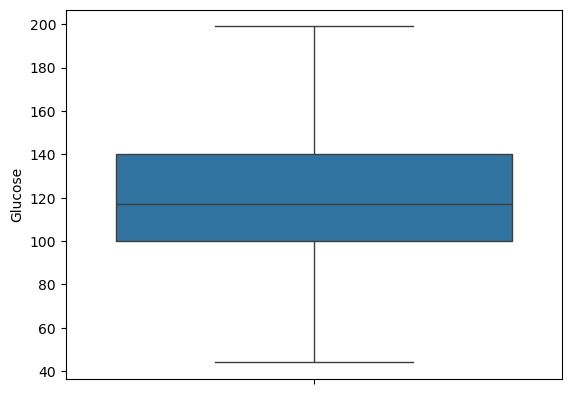

In [19]:
sns.boxplot(df1['Glucose'])

<Axes: xlabel='Glucose', ylabel='Count'>

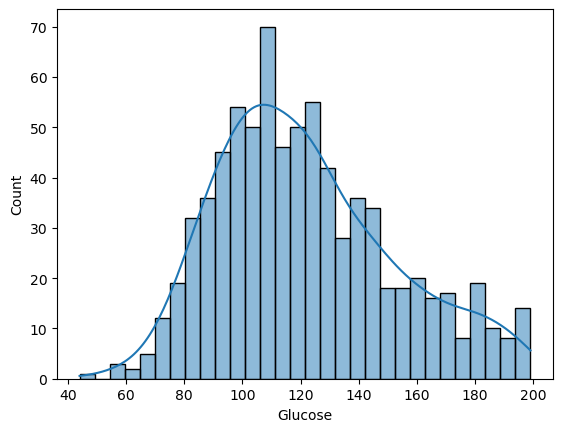

In [20]:
sns.histplot(df1['Glucose'],bins=30,kde=True)

In [21]:
from scipy.stats import shapiro

stat, p = shapiro(df1['Glucose'])
stat, p

(np.float64(0.9696213673507964), np.float64(1.523253553881892e-11))

모양이 정규성을 띄는것 같아 검정해 보았으나, Shapiro-Wilk 검정 결과, 검정통계량은 비교적 근접하였으나, P-value가 0.05보다 매우 작아 정규성은 기각되었다.

<Axes: xlabel='Outcome', ylabel='Glucose'>

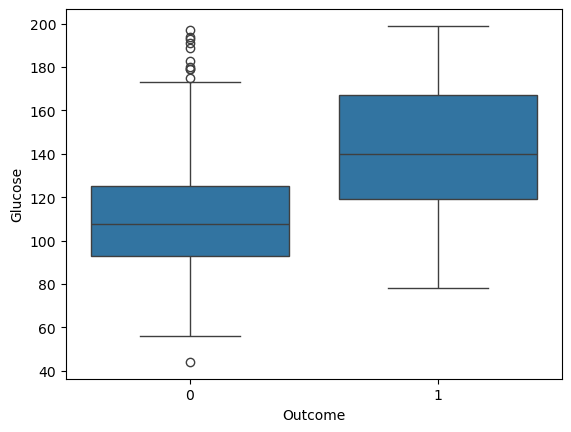

In [22]:
sns.boxplot(x='Outcome',y='Glucose',data=df1)

또한, 혈당이 높을수록 당뇨 발생 가능성이 높다.

### **변수 인사이트 정리**

혈당이 0이 될 수 없으나 0인 데이터가 있어 이를 중앙값으로 대체해주었다. 또한, Glucose의 변수 모양이 정규성을 띄는것 처럼 보였으나 검증 결과 그렇지 않다는 것을 알았다. 추가적으로, 혈당이 높을수록 당뇨 발생 가능성이 높다.

## **bloodpressure**
- 혈압
- 혈압도 0일 수는 없다 

In [68]:
# 셀 추가해서 EDA 하기

In [23]:
df1['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

<Axes: ylabel='BloodPressure'>

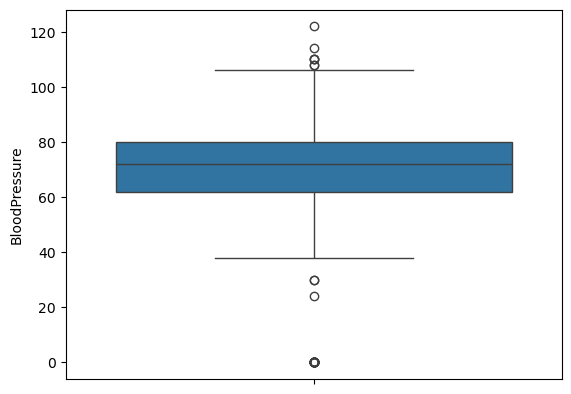

In [24]:
sns.boxplot(df1['BloodPressure'])

<Axes: xlabel='BloodPressure', ylabel='Count'>

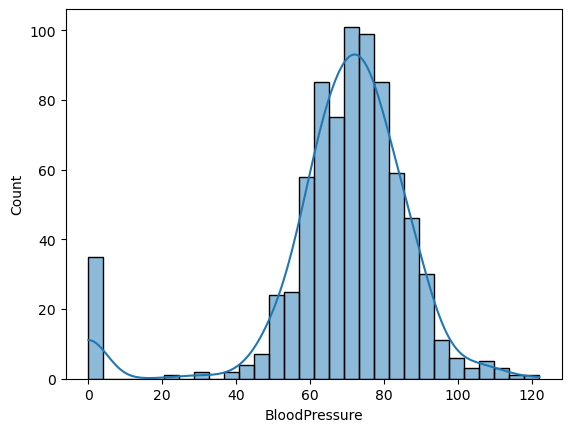

In [25]:
sns.histplot(df1['BloodPressure'],bins=30,kde=True)

혈압이 0일 수 없으나 0인 데이터들이 있음.

In [27]:
(df1['BloodPressure']==0).sum()

np.int64(35)

행 자체 누락인지 확인

In [28]:
df1[df1['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


 - 행 자체 누락은 아니나 BloodPressure, SkinThickness, Insulin이 다 0이여서 이러한 데이터들을 그냥 중앙값으로 대체하면 문제가 생길 것 같다고 예상, 특히 Randomforest같은 모델링에서는 분할 기준을 값 자체로 두므로 인위적인 clustering이 발생될 것으로 예상됨.

 - 여러 데이터가 동시에 0으로 기록된 관측치는 실제 측정값으로 보기 어렵다고 판단하여, 행 자체를 제거하기로 판단하여 세 변수가 전부 결측인경우 제거

In [30]:
df1[(df1['BloodPressure'] == 0) & (df1['SkinThickness'] == 0) & (df1['Insulin'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1
266,0,138,0,0,0,36.3,0.933,25,1


In [32]:
df1 = df1[~((df1['BloodPressure'] == 0) & (df1['SkinThickness'] == 0) & (df1['Insulin'] == 0))]

In [33]:
df1[(df1['BloodPressure'] == 0) & (df1['SkinThickness'] == 0) & (df1['Insulin'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


제거된 것을 확인

In [34]:
(df1['BloodPressure']==0).sum()

np.int64(2)

In [35]:
df1[df1['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
172,2,87,0,23,0,28.9,0.773,25,0
357,13,129,0,30,0,39.9,0.569,44,1


위에 두 변수들은 BloodPreesure와 Insulin 변수가 0이긴 하나 위에서 분석한 Pregnancies 변수와 Glucose의 비례성을 잘 나타내서 두 변수들만 중앙값으로 대체

In [40]:
t = (df1['BloodPressure'] == 0) & (df1['Insulin'] == 0)
df1.loc[t, ['BloodPressure', 'Insulin']]

,BloodPressure,Insulin
172,0,0
357,0,0


In [42]:
df1.loc[t, 'BloodPressure'] = df1['BloodPressure'].median()
df1.loc[t, 'Insulin'] = df1['Insulin'].median()

In [43]:
df1[df1['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


<Axes: ylabel='BloodPressure'>

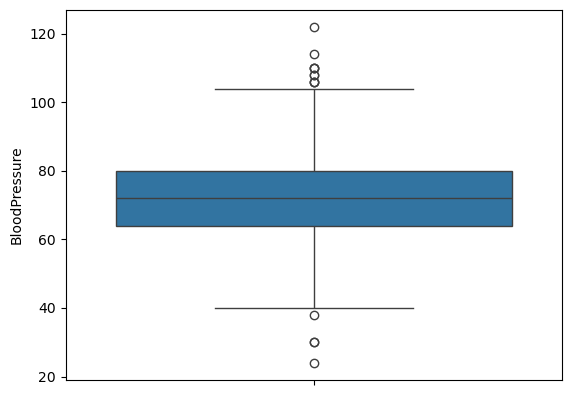

In [44]:
sns.boxplot(df1['BloodPressure'])

<Axes: xlabel='BloodPressure', ylabel='Count'>

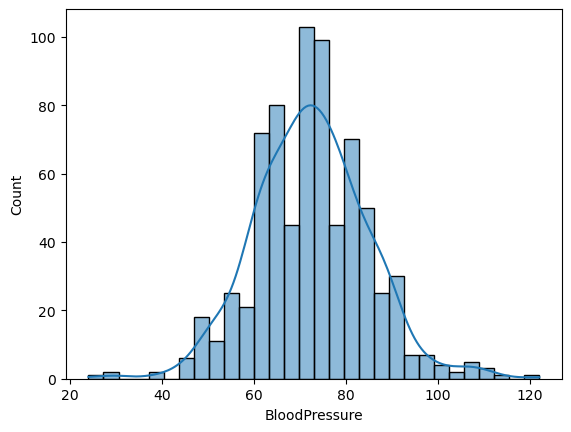

In [48]:
sns.histplot(df1['BloodPressure'],bins=30,kde=True)

In [52]:
stat, p = shapiro(df1['BloodPressure'])
stat, p

(np.float64(0.9902164630210903), np.float64(8.349024028721442e-05))

이것도 정규성으로 보이나, 정규성이 기각되어 조사해보니 표본 수가 커질수록 작은 왜도 / 꼬리 차이도 잡아내어 정규성을 따르지 않는다는 것을 알 수 있었다.

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

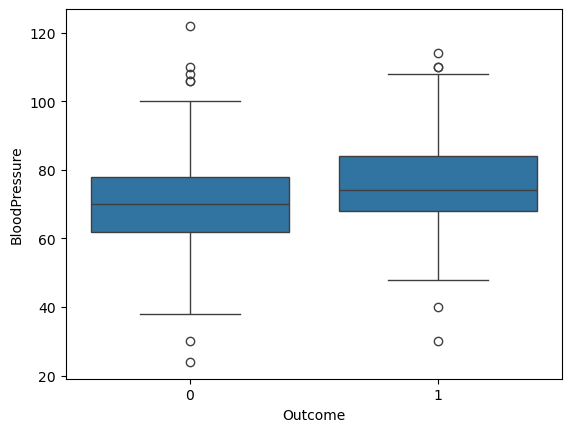

In [51]:
sns.boxplot(x='Outcome',y='BloodPressure',data=df1)

또한 혈압이 높을 수록 당뇨병일 가능성이 높다는 것을 알 수 있었다.

### **변수 인사이트 정리**

 - 혈압 변수들이 결측값인 것이 많아 해당 행들을 다 봐본 결과, 혈압 뿐 아니라 삼두근 피부 두께, 인슐린 분비량 등 다른 결측값이 많은 경우가 있었다.
 - 데이터들 중 세 변수가 다 결측값인 경우가 결측값을 대체하더라도 분석에 용이하지 않을 것 같아 제거했다.
 - 혈압이 높을 수록 당뇨병일 가능성이 높다.

## **SkinThickness**
- 삼두근 피부 두께
- 체지방이란 관련이 있다.
- 0일 수 없다

In [ ]:
# 셀 추가해서 EDA 하기

In [54]:
df1['SkinThickness'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

In [55]:
(df1['SkinThickness']==0).sum()

np.int64(194)

<Axes: ylabel='SkinThickness'>

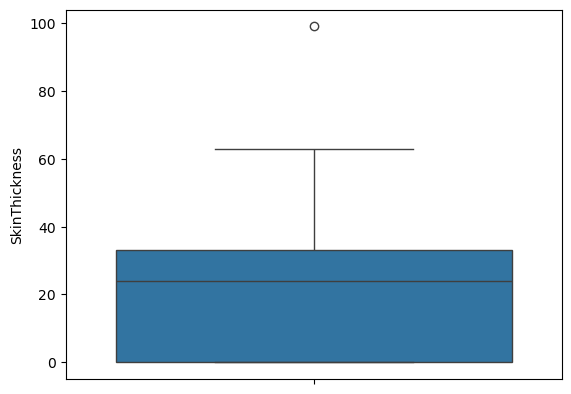

In [56]:
sns.boxplot(df1['SkinThickness'])

<Axes: xlabel='SkinThickness', ylabel='Count'>

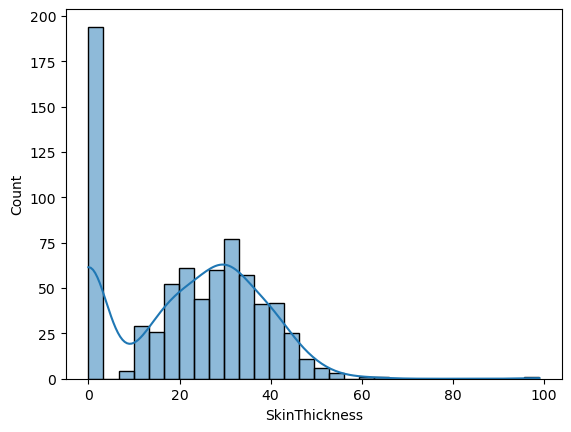

In [57]:
sns.histplot(df1['SkinThickness'],bins=30,kde=True)

In [59]:
df1[df1['SkinThickness'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


SkinThickness 같은 경우는 결측값이 너무 많아서 중앙값이나 평균값으로 대체하면 너무 중앙쪽에 데이터가 쏠리고 개인 차이가 없어질 것으로 예상되어, BMI와 SkinThickness가 둘다 0이 아닌 경우를 분석한 뒤에 단순 선형회귀기반으로 대체할 것이다.

In [60]:
df_nonzero = df1[df1['SkinThickness'] != 0]

BMI가 0인 상황도 제외하여 분석에 용이하도록 하기

In [62]:
df_nonzero[df_nonzero['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0


In [63]:
df_nonzero = df_nonzero[df_nonzero['BMI'] != 0]

In [64]:
df_nonzero

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [65]:
df_nonzero[df_nonzero['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [66]:
df_nonzero[df_nonzero['SkinThickness']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [67]:
df_nonzero[['BMI', 'SkinThickness']].corr()

,BMI,SkinThickness
BMI,1.000000,0.648214
SkinThickness,0.648214,1.000000


약한 상관계수를 보임.

<Axes: xlabel='BMI', ylabel='SkinThickness'>

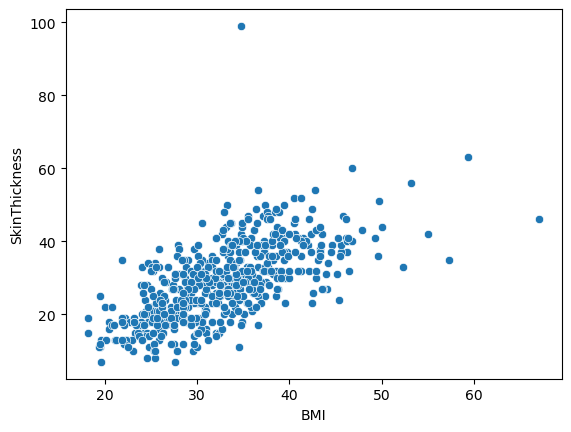

In [68]:
sns.scatterplot(data=df_nonzero, x='BMI', y='SkinThickness')

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
X = df_nonzero[['BMI']]
y = df_nonzero['SkinThickness']

lr = LinearRegression()
lr.fit(X, y)

a = lr.coef_[0]
b = lr.intercept_

In [73]:
a, b

(np.float64(0.9894820593536617), np.float64(-3.3734851539664312))

## SkinThickness = 0.989 * BMI - 3.37

이런 형식으로 정리

In [78]:
t1 = (df1['SkinThickness'] == 0) & (df1['BMI'] != 0)

In [79]:
df1.loc[t1, 'SkinThickness'] = a * df1.loc[t1, 'BMI'] + b

In [80]:
df1[df1['SkinThickness'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0.0,0,0.0,0.232,54,1
684,5,136,82,0.0,0,0.0,0.640,69,0


In [81]:
df1[df1['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0.0,0,0.0,0.232,54,1
145,0,102,75,23.0,0,0.0,0.572,21,0
371,0,118,64,23.0,89,0.0,1.731,21,0
684,5,136,82,0.0,0,0.0,0.640,69,0


SkinThickness와 BMI 둘다 0일 때는 BMI를 먼저 중앙값으로 대체한 뒤에 SkinThickness를 보정하는 경우도 있으나 이러면 개인 편차라는 것이 없어진다고 생각하여 행을 제거.

BMI만 0인 경우도 표본수가 적으므로 전부 제거.

In [83]:
(df1['BMI'] == 0).sum()

np.int64(4)

In [85]:
df1 = df1[df1['BMI'] != 0]

In [86]:
(df1['BMI'] == 0).sum()

np.int64(0)

<Axes: ylabel='SkinThickness'>

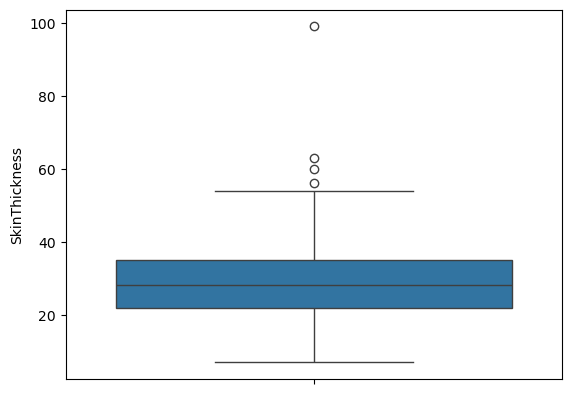

In [89]:
sns.boxplot(df1['SkinThickness'])

<Axes: xlabel='SkinThickness', ylabel='Count'>

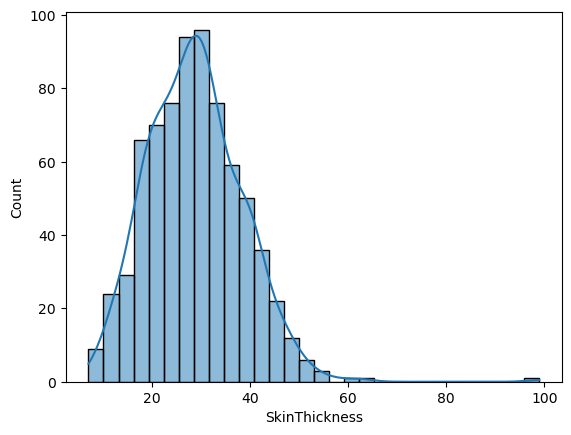

In [90]:
sns.histplot(df1['SkinThickness'],bins=30,kde=True)

<Axes: xlabel='Outcome', ylabel='SkinThickness'>

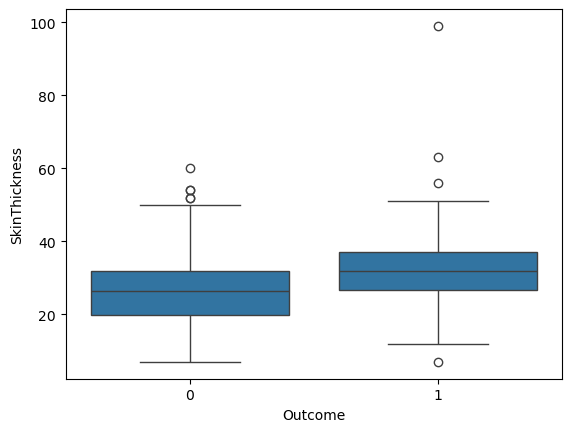

In [88]:
sns.boxplot(x='Outcome',y='SkinThickness',data=df1)

In [ ]:
SkinThickness 수치가 높을 수록 당뇨병에 걸릴 확률이 높다.

### **변수 인사이트 정리**

 - SkinThickness을 처음 봤을 때 결측값이 너무 많아 평균값이나 중앙값으로 대체하면 개인 편차가 없어질 것으로 생각되어 BMI를 활용한 선형회귀분석으로 데이터들을 대체해 주었고, 선형회귀 모델로 대체한 후 추가적으로 BMI가 0인 경우를 봤을 때 BMI가 0인 부분의 표본이 굉장히 적어서 제거해주었다.
 - 또한, SkinThickness 수치가 높을 수록 당뇨병에 걸릴 확률이 높다는 것을 알았다.

## **Insulin**
- 인슐린 분비량
- 당뇨병 유형은 인슐린이 선천적으로 나오지 않는 사람(1형)과 인슐린이 나오지만 인식을 못하는 사람(2형) 당뇨병 두가지가 있다.  

In [ ]:
# 셀 추가해서 EDA 하기

In [91]:
df1['Insulin'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  45,  55,  58, 160, 210, 318,  44, 190, 280,  87,
       271, 129, 120, 478,  56,  32, 744, 370, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465, 158,  84,  72,  59,  81, 196,
       415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95, 237,
       191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65, 166,
       274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15, 183,
        91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 392, 17

In [92]:
(df1['Insulin'] == 0).sum()

np.int64(336)

0인 값이 굉장히 많음을 알 수 있다.

In [94]:
df1[df1['Insulin'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,0,33.6,0.627,50,1
1,1,85,66,29.000000,0,26.6,0.351,31,0
2,8,183,64,19.681447,0,23.3,0.672,32,1
5,5,116,74,21.957256,0,25.6,0.201,30,0
10,4,110,92,33.831040,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31.000000,0,44.0,0.403,43,1
762,9,89,62,18.889861,0,22.5,0.142,33,0
764,2,122,70,27.000000,0,36.8,0.340,27,0
766,1,126,60,26.409925,0,30.1,0.349,47,1


인슐린 수치중에서 구분했을때
 - Outcome = 1 이고, Insulin이 0이면 1형 당뇨일 가능성이 있다.
 - Outcome = 0 이고, Insulin이 0이면 의학적으로 성립이 안된다. -> 누락값이다.
 - 따라서 0,0 인 경우는 missing flag를 띄우고, 1,0 일때는 1형 당뇨가 가능하므로 0값을 유지한다.

분석에 용이하도록 missing flag를 띄운 0,0에는 median값을 넣어준다.

In [98]:
df1.loc[(df1['Insulin'] == 0) & (df1['Outcome'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29.000000,0,26.6,0.351,31,0
5,5,116,74,21.957256,0,25.6,0.201,30,0
10,4,110,92,33.831040,0,37.6,0.191,30,0
12,10,139,80,23.441479,0,27.1,1.441,57,0
21,8,99,84,31.654180,0,35.4,0.388,50,0
...,...,...,...,...,...,...,...,...,...
756,7,137,90,41.000000,0,32.0,0.391,39,0
758,1,106,76,33.732092,0,37.5,0.197,26,0
762,9,89,62,18.889861,0,22.5,0.142,33,0
764,2,122,70,27.000000,0,36.8,0.340,27,0


누락값이라 생각한 0,0인 경우가 상당히 많으므로 행을 배제하는 것이 아닌 missing flag 변수를 생성하여 사용한다.

In [102]:
df1=df1.copy()

In [103]:
df1['Insulin_missing'] = np.where((df1['Outcome'] == 0) & (df1['Insulin'] == 0), 1, 0)

In [104]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_missing
0,6,148,72,35.000000,0,33.6,0.627,50,1,0
1,1,85,66,29.000000,0,26.6,0.351,31,0,1
2,8,183,64,19.681447,0,23.3,0.672,32,1,0
3,1,89,66,23.000000,94,28.1,0.167,21,0,0
4,0,137,40,35.000000,168,43.1,2.288,33,1,0
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180,32.9,0.171,63,0,0
764,2,122,70,27.000000,0,36.8,0.340,27,0,1
765,5,121,72,23.000000,112,26.2,0.245,30,0,0
766,1,126,60,26.409925,0,30.1,0.349,47,1,0


In [107]:
median_insulin = df1.loc[df1['Insulin'] > 0, 'Insulin'].median()
df1['Insulin_missing'] = ((df1['Insulin'] == 0) & (df1['Outcome'] == 0)).astype(int)
df1.loc[df1['Insulin_missing'] == 1, 'Insulin'] = median_insulin

In [109]:
df1[df1['Insulin'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_missing
0,6,148,72,35.000000,0,33.6,0.627,50,1,0
2,8,183,64,19.681447,0,23.3,0.672,32,1,0
11,10,168,74,34.226833,0,38.0,0.537,34,1,0
17,7,107,74,25.915184,0,29.6,0.254,31,1,0
22,7,196,90,36.007901,0,39.8,0.451,41,1,0
...,...,...,...,...,...,...,...,...,...,...
754,8,154,78,32.000000,0,32.4,0.443,45,1,0
757,0,123,72,32.544714,0,36.3,0.258,52,1,0
759,6,190,92,31.753128,0,35.5,0.278,66,1,0
761,9,170,74,31.000000,0,44.0,0.403,43,1,0


In [112]:
df1.loc[(df1['Insulin'] == 0) & (df1['Outcome'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_missing


In [113]:
df1.loc[(df1['Insulin'] == 0) & (df1['Outcome'] == 1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_missing
0,6,148,72,35.000000,0,33.6,0.627,50,1,0
2,8,183,64,19.681447,0,23.3,0.672,32,1,0
11,10,168,74,34.226833,0,38.0,0.537,34,1,0
17,7,107,74,25.915184,0,29.6,0.254,31,1,0
22,7,196,90,36.007901,0,39.8,0.451,41,1,0
...,...,...,...,...,...,...,...,...,...,...
754,8,154,78,32.000000,0,32.4,0.443,45,1,0
757,0,123,72,32.544714,0,36.3,0.258,52,1,0
759,6,190,92,31.753128,0,35.5,0.278,66,1,0
761,9,170,74,31.000000,0,44.0,0.403,43,1,0


In [114]:
df1.loc[(df1['Insulin'] == 0) & (df1['Outcome'] == 1) & (df1['Insulin_missing'] == 1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_missing


In [115]:
df1.loc[(df1['Insulin'] == 0) & (df1['Outcome'] == 1) & (df1['Insulin_missing'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_missing
0,6,148,72,35.000000,0,33.6,0.627,50,1,0
2,8,183,64,19.681447,0,23.3,0.672,32,1,0
11,10,168,74,34.226833,0,38.0,0.537,34,1,0
17,7,107,74,25.915184,0,29.6,0.254,31,1,0
22,7,196,90,36.007901,0,39.8,0.451,41,1,0
...,...,...,...,...,...,...,...,...,...,...
754,8,154,78,32.000000,0,32.4,0.443,45,1,0
757,0,123,72,32.544714,0,36.3,0.258,52,1,0
759,6,190,92,31.753128,0,35.5,0.278,66,1,0
761,9,170,74,31.000000,0,44.0,0.403,43,1,0


<Axes: xlabel='Outcome', ylabel='Insulin'>

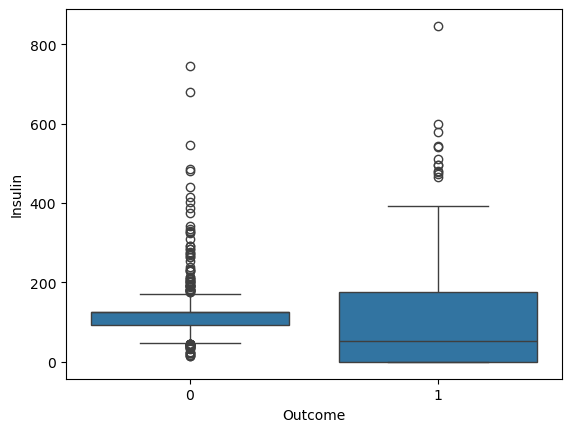

In [116]:
sns.boxplot(x='Outcome',y='Insulin',data=df1)

<Axes: xlabel='Insulin_missing', ylabel='Insulin'>

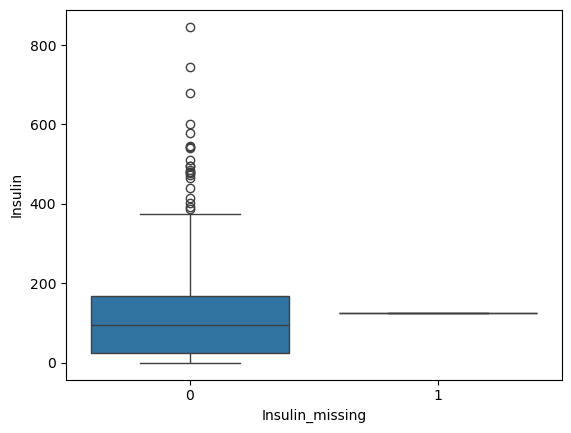

In [117]:
sns.boxplot(x='Insulin_missing',y='Insulin',data=df1)

미싱플래그로 인해 분석이 용이하지 않으므로 미싱플래그를 띄운 부분을 제외하고 plot들 보고 분석해보기

In [119]:
df_plot = df1[df1['Insulin_missing'] == 0]

<Axes: xlabel='Outcome', ylabel='Insulin'>

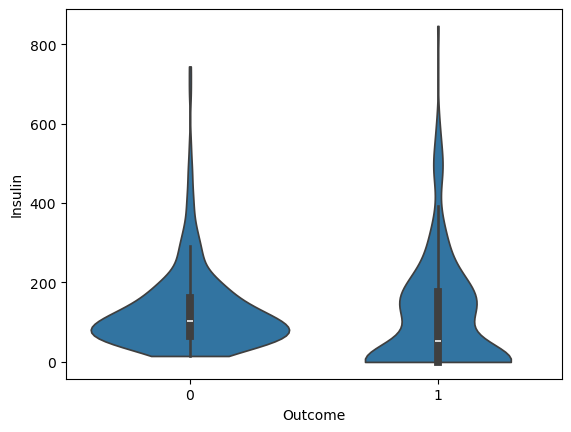

In [120]:
sns.violinplot(x='Outcome',y='Insulin',data=df_plot,cut=0)

1형 당뇨를 고려해 outcome 수치가 1일 때 insulin이 0인 부분을 제외하고 생각한다면, 인슐린 수치가 높을 수록 당뇨병일 확률이 높다고 볼 수 있다.

### **변수 인사이트 정리**


 - 당뇨병같은 경우는 1,2형 당뇨처럼 인슐린 수치가 0도 가능하므로, Outcome=0, Insulin=0일 때를 missing flag(결측값)으로 지정해주었다. 또한 missing flag=1 인 인슐린 데이터는 median으로 대체해주었다.
 - 인슐린 수치가 높을 수록 당뇨병일 확률이 높다고 볼 수 있다.

## **BMI**
- 0이 나올 수 없는 값

BMI같은 경우는 결측값인 경우를 위에 SkinThickness를 처리할 때 제거해 주었으므로 분석만 한다.

In [121]:
df1['BMI'].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 30.5, 37.6, 38. , 27.1,
       30.1, 25.8, 45.8, 29.6, 43.3, 34.6, 39.3, 35.4, 39.8, 29. , 36.6,
       31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8, 19.9, 27.6, 24. ,
       33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4, 27.4, 42. , 29.7,
       28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. , 37.7, 46.8, 40.5,
       41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9, 28.6, 43.4, 35.1,
       32. , 24.7, 32.6, 22.4, 29.3, 24.6, 48.8, 32.4, 38.5, 26.5, 19.1,
       46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. , 26.1, 22.5, 39.6, 29.5,
       34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2, 26.8, 55. , 42.9, 34.5,
       27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5, 27.3, 21.9, 40.6, 47.9,
       50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9, 28.4, 43.5, 32.7, 67.1,
       45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4, 24.3, 22.9, 34.8, 30.9,
       40.1, 23.9, 37.5, 35.5, 42.8, 42.6, 41.8, 35.8, 30. , 37.8, 28.8,
       23.6, 35.7, 36.7, 45.2, 44. , 46.2, 35. , 43

<Axes: ylabel='BMI'>

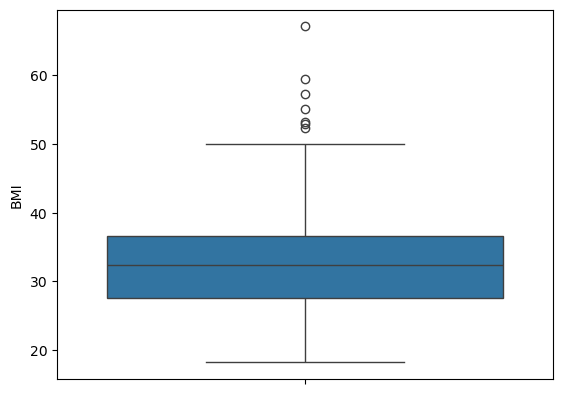

In [122]:
sns.boxplot(df1['BMI'])

<Axes: xlabel='BMI', ylabel='Count'>

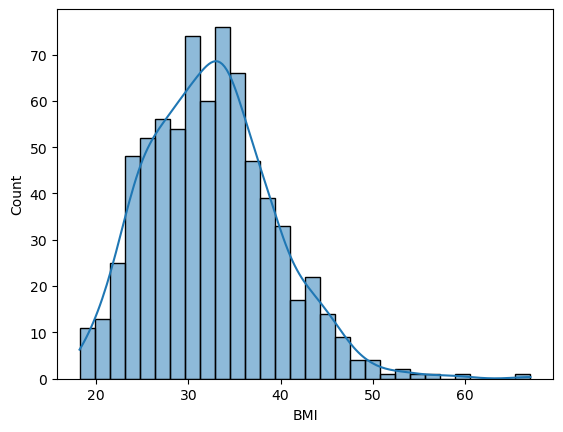

In [123]:
sns.histplot(df1['BMI'],bins=30,kde=True)

In [124]:
df1[df1['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_missing


<Axes: xlabel='Outcome', ylabel='BMI'>

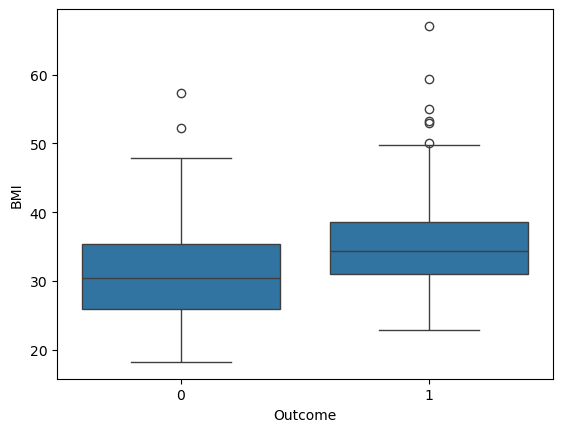

In [126]:
sns.boxplot(x='Outcome',y='BMI',data=df1)

### **변수 인사이트 정리**

- BMI같은 경우는 위에 Skinthickness데이터를 전처리 할 때, 같이 전처리해주었으므로, 결과만 분석하였다.
- BMI 수치가 높을 수록 당뇨병일 확률이 높다.

## **파생변수 생성 및 추가 전처리**

In [ ]:
# 셀 추가해서 하기

In [ ]:
BMI 같은 경우를 구간을 나눠보았다.

In [147]:
df1['BMI_group'] = pd.cut(
    df1['BMI'],
    bins=[0, 18.5, 25, 30, 100],
    labels=[0, 1, 2, 3]
)

In [ ]:
Glucose가 높은 경우( 140이상 )를 고혈압으로 체크해보았다.

In [148]:
df1['High_Glucose'] = (df1['Glucose'] >= 140).astype(int)

# **모델링하기**

In [149]:
# 2) 목표변수 / 설명변수 설정
# 파생 변수는 추가하고, 필요 없는 변수는 빼기

X = df1[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','BMI_group','High_Glucose']]
Y = df1['Outcome'] # Y값에는 결측치가 존재해서는 안됨

In [150]:
# 3) 학습데이터와 검증데이터를 분할
# pip install scikit-learn
from sklearn.model_selection import train_test_split

In [151]:
train_test_split(X,Y) # X 데이터의 학습, 검증 데이터 & Y 데이터의 학습, 검증데이터 4개로 분리됨

[     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 317            3      182             74      26.805718        0  30.5   
 326            1      122             64      32.000000      156  35.1   
 746            1      147             94      41.000000        0  49.3   
 354            3       90             78      38.877399      125  42.7   
 241            4       91             70      32.000000       88  33.1   
 ..           ...      ...            ...            ...      ...   ...   
 292            2      128             78      37.000000      182  43.3   
 574            1      143             86      30.000000      330  30.1   
 686            3      130             64      19.483550      125  23.1   
 47             2       71             70      27.000000      125  28.0   
 297            0      126             84      29.000000      215  30.7   
 
      DiabetesPedigreeFunction  Age BMI_group  High_Glucose  
 317                     0.345   29 

In [152]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1234)
# train_test_split()에 별도의 옵션을 지정하지 않으면 75:25로 학습:검증 분할됨
# random_state을 지정해야 같은 결과가 나옴

In [153]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
BMI_group                   0
High_Glucose                0
dtype: int64

In [154]:
Y.isnull().sum()

np.int64(0)

=> X에도 결측치가 없는 데이터이지만, 추후 새로 들어올 데이터에 결측치가 존재할 수 있음

# **각자 공부한 모델 쓰기**

In [155]:
# 4) 학습 수행
from sklearn.ensemble import RandomForestClassifier

In [161]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,          # 깊이 제한
    min_samples_leaf=10,  # 리프 최소 샘플
    random_state=42
)

model.fit(X_train, Y_train) # 학습 수행

,n_estimators,300
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [162]:
# 5) 성능 확인
from sklearn.metrics import accuracy_score
# 정확도 : 전체 데이터 중 얼만큼 정확히 분류했는지 비율

In [163]:
Y_train_pred = model.predict(X_train)

In [164]:
Y_test_pred = model.predict(X_test)

In [165]:
print('학습 정확도 : ', accuracy_score(Y_train, Y_train_pred)) # 여러 알고리즘에 대한 모델을 비교할 때 확인해야 함
print('검증 정확도 : ', accuracy_score(Y_test, Y_test_pred))

학습 정확도 :  0.9032846715328468
검증 정확도 :  0.8469945355191257


### 과적합(Overfitting)

- 과적합 : 학습 데이터에 대해서는 Model이 높은 성능을 나타내지만, 검증데이터에서는 성능이 낮게 나오는 현상
- 해결 : 특성공학을 통해 데이터를 더 깔끔하게 생성

### 특성공학(Feature Engineering)
- **특성공학** : 학습의 목적에 맞게(학습이 잘 수행될 수 있도록) 데이터를 깔끔하게 다듬는 작업
- 대표적 기법 : 
  1. Scaling & Encoding : 숫자 데이터의 스케일을 맞추거나, 문자 데이터를 숫자로 변환하여 학습에 사용
  2. Imputation : 데이터 상에 존재하는 결측값에 대해 다른 값으로 대치 (새로 들어오는 데이터가 결측일 수도 있기 때문에)
  3. Cross Validation (교차검증): 학습데이터를 여러 단계로 나누어 분할하여 학습
  4. Hyper Parameter Tuning : 학습 알고리즘 내 존재하는 수학적 구조나 학습에 발생하는 구조, 함수들을 사용자가 통제
  5. Imbalanced Data Sampling : 목표변수의 비율이 깨져있는 데이터를 맞추어 학습
  6. Feature Selection : 목표변수에 가장 영향이 있는 인자를 사용자가 지정한 만큼 선택해서 학습
  7. PCA : 데이터의 차원을 줄이거나 특성을 재구성하여 학습

- Scikit Learn에서 특성공학 기법과 학습을 동시에 수행할 수 있게 Pipe Line 구성하여 학습을 수행

In [166]:
# 4) 학습 수행
from sklearn.pipeline import make_pipeline # 특성공학 + 학습
from sklearn.impute import SimpleImputer # 결측값 단순 대치 기법
from sklearn.tree import DecisionTreeClassifier # 학습 알고리즘(의사결정나무)
from sklearn.preprocessing import StandardScaler #Standard Scaling

In [167]:
# 파이프라인 구조 설계
#스케일링 하고 싶으면 StandardScaler() 사용

model_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    DecisionTreeClassifier(random_state=42)
)
model_pipe

,steps,"[('simpleimputer', ...), ('decisiontreeclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,criterion,'gini'


In [168]:
model_pipe.fit(X_train, Y_train)

,steps,"[('simpleimputer', ...), ('decisiontreeclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,criterion,'gini'


In [169]:
Y_train_pred = model_pipe.predict(X_train)
Y_test_pred = model_pipe.predict(X_test)

In [170]:
print('학습 정확도 :', accuracy_score(Y_train, Y_train_pred))
print('검증 정확도 :', accuracy_score(Y_test, Y_test_pred))

학습 정확도 : 1.0
검증 정확도 : 0.8360655737704918


In [171]:
model_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    DecisionTreeClassifier(
        max_depth=5,
        min_samples_leaf=10,
        random_state=42
    )
)

In [172]:
model_pipe

,steps,"[('simpleimputer', ...), ('decisiontreeclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,criterion,'gini'


In [173]:
model_pipe.fit(X_train, Y_train)

,steps,"[('simpleimputer', ...), ('decisiontreeclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,criterion,'gini'


In [174]:
Y_train_pred = model_pipe.predict(X_train)
Y_test_pred = model_pipe.predict(X_test)

In [175]:
print('학습 정확도 :', accuracy_score(Y_train, Y_train_pred))
print('검증 정확도 :', accuracy_score(Y_test, Y_test_pred))

학습 정확도 : 0.8959854014598541
검증 정확도 : 0.8524590163934426


In [178]:
model_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    RandomForestClassifier(
        random_state=42
    )
)

In [179]:
model_pipe

,steps,"[('simpleimputer', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,n_estimators,100


In [180]:
model_pipe.fit(X_train, Y_train)

,steps,"[('simpleimputer', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,n_estimators,100


In [181]:
Y_train_pred = model_pipe.predict(X_train)
Y_test_pred = model_pipe.predict(X_test)

In [182]:
print('학습 정확도 :', accuracy_score(Y_train, Y_train_pred))
print('검증 정확도 :', accuracy_score(Y_test, Y_test_pred))

학습 정확도 : 1.0
검증 정확도 : 0.8579234972677595


In [183]:
from sklearn.model_selection import GridSearchCV

### **공부한 모델의 하이퍼파라미터**
#### Randomforest 모델의 하이퍼 하이퍼파라미터 정리

- n_estimators는 생성할 트리의 개수이다. 값을 키우면 성능 안정화가 되지만, 계산 시간이 올라간다.
  일반적으로 값을 키우면 과적합을 줄일 수 있으며, 보통 100~500사이를 사용한다.

- max_depth는 각 트리의 최대 깊이이다. 값을 키우면 모델이 매우 복잡해지고 학습 정확도는 올라가나 검증 성능이 떨어지는 과적합이 발생한다. 값을 줄이면 트리가 단순화 되며, 일반화 성능이 올라간다.

- min_samples_split은 노드를 분할하기 위한 최소 샘플 수이다. 값을 키우면 분할이 덜 일어나고 과적합을 줄일 수 있다.

- min_samples_leaf는 리프 노드가 가져야 할 최소 샘플 수이다. 값을 키우면 극단적인 분기를 방지하고 일반화 성능이 올라간다.

- max_features는 분기 시 고려할 최대 특성 개수이다. 값이 작을수록 트리 간 다양성이 증가하여 과적합이 감소한다.

- class_weight는 불균형 데이터 즉, 클래스별 가중치를 조정해준다. 'balanced' 사용 시 소수 클래스의 학습을 강화해준다.

In [184]:
# 하이퍼파라미터 튜닝 및 교차검증
hyperparam = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 5, 10],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 5, 10],
    'randomforestclassifier__max_features': ['sqrt', 'log2'],
    'randomforestclassifier__class_weight': [None, 'balanced']
}

grid_model1 = GridSearchCV(model_pipe, param_grid = hyperparam, cv=3,
                          scoring='f1', n_jobs=-1)
grid_model1.fit(X_train, Y_train)
best_model1 = grid_model1.best_estimator_

In [185]:
best_model1

,steps,"[('simpleimputer', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,n_estimators,200


In [186]:
# 5) 평가
Y_train_pred = best_model1.predict(X_train) # 학습 데이터의 예측값 계산
Y_test_pred = best_model1.predict(X_test) # 검증데이터의 예측값 계산

In [187]:
from sklearn.metrics import classification_report

In [188]:
# 학습 성능 평가
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       367
           1       0.86      0.86      0.86       181

    accuracy                           0.91       548
   macro avg       0.90      0.90      0.90       548
weighted avg       0.91      0.91      0.91       548



In [189]:
# 일반화 성능 평가
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       112
           1       0.85      0.75      0.80        71

    accuracy                           0.85       183
   macro avg       0.85      0.83      0.84       183
weighted avg       0.85      0.85      0.85       183



# **성능을 높이기 위한 방안**

1. test 데이터의 정확도가 test 데이터의 정확도보다 많이 낮으면 과적합
2. 하이퍼파라미터 튜닝, 추가적인 전처리(변수 제거) 혹은 파생변수 생성 으로 이를 해결 할 수 있다.  